In [3]:

import pandas as pd
import chardet

# Detect file encoding
with open("/Users/jarvis/Downloads/Monthly Prescription Drug Plan Formulary and Pharmacy Network Information/2025-01/2025_20250123/plan information  20250131.txt", "rb") as file:
    raw_data = file.read()
    detected_encoding = chardet.detect(raw_data)["encoding"]

# Read the file with the detected encoding
df = pd.read_csv("/Users/jarvis/Downloads/Monthly Prescription Drug Plan Formulary and Pharmacy Network Information/2025-01/2025_20250123/plan information  20250131.txt", sep="|", encoding=detected_encoding,on_bad_lines="skip")

# Save as CSV
df.to_csv("/Users/jarvis/pymycod/US_Formulary/plan_info.csv", index=False, encoding="utf-8")

print("Conversion successful! File saved as output.csv")

/var/folders/g_/c4f93b1s3sb7z3s30n19hdzh0000gn/T/ipykernel_26069/2979192773.py:10: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/jarvis/Downloads/Monthly Prescription Drug Plan Formulary and Pharmacy Network Information/2025-01/2025_20250123/plan information  20250131.txt", sep="|", encoding=detected_encoding,on_bad_lines="skip")


Conversion successful! File saved as output.csv


In [ ]:


import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
import pandas as pd

# Load the formulary data
df = pd.read_csv("plan_info.csv")

# Display basic info
print(df.info())
print(df.describe())

# Display first 5 rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116071 entries, 0 to 116070
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CONTRACT_ID         116071 non-null  object 
 1   PLAN_ID             116071 non-null  int64  
 2   SEGMENT_ID          116071 non-null  int64  
 3   CONTRACT_NAME       116071 non-null  object 
 4   PLAN_NAME           116071 non-null  object 
 5   FORMULARY_ID        116071 non-null  int64  
 6   PREMIUM             116071 non-null  float64
 7   DEDUCTIBLE          116071 non-null  int64  
 8   MA_REGION_CODE      116071 non-null  object 
 9   PDP_REGION_CODE     116071 non-null  object 
 10  STATE               116071 non-null  object 
 11  COUNTY_CODE         116071 non-null  object 
 12  SNP                 116071 non-null  int64  
 13  PLAN_SUPPRESSED_YN  116071 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 12.4+ MB
None
             PLAN_ID 

/var/folders/g_/c4f93b1s3sb7z3s30n19hdzh0000gn/T/ipykernel_26069/3927508503.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("plan_info.csv")


,CONTRACT_ID,PLAN_ID,SEGMENT_ID,CONTRACT_NAME,PLAN_NAME,FORMULARY_ID,PREMIUM,DEDUCTIBLE,MA_REGION_CODE,PDP_REGION_CODE,STATE,COUNTY_CODE,SNP,PLAN_SUPPRESSED_YN
0,H0022,1,0,"BUCKEYE COMMUNITY HEALTH PLAN, INC.",Buckeye Health Plan - MyCare Ohio (Medicare-Me...,25045,0.0,0,,,OH,36110,0,N
1,H0022,1,0,"BUCKEYE COMMUNITY HEALTH PLAN, INC.",Buckeye Health Plan - MyCare Ohio (Medicare-Me...,25045,0.0,0,,,OH,36170,0,N
2,H0022,1,0,"BUCKEYE COMMUNITY HEALTH PLAN, INC.",Buckeye Health Plan - MyCare Ohio (Medicare-Me...,25045,0.0,0,,,OH,36260,0,N
3,H0022,1,0,"BUCKEYE COMMUNITY HEALTH PLAN, INC.",Buckeye Health Plan - MyCare Ohio (Medicare-Me...,25045,0.0,0,,,OH,36280,0,N
4,H0022,1,0,"BUCKEYE COMMUNITY HEALTH PLAN, INC.",Buckeye Health Plan - MyCare Ohio (Medicare-Me...,25045,0.0,0,,,OH,36290,0,N


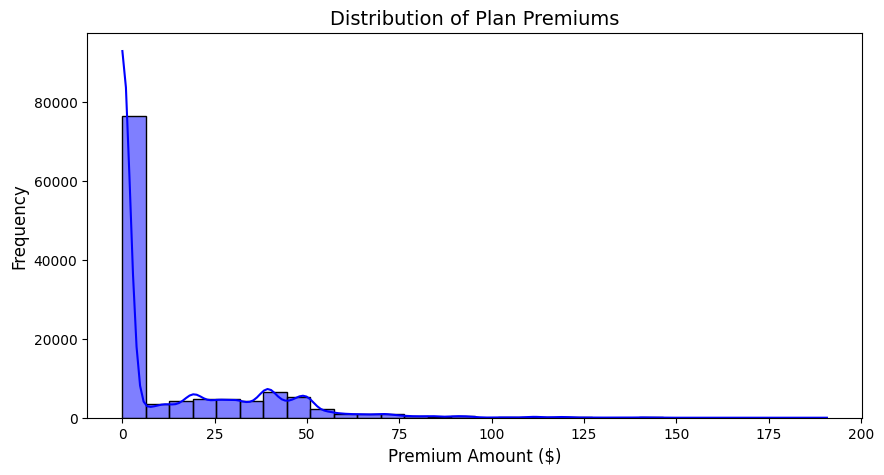

In [10]:
########## Distribution of Premiums ##########
plt.figure(figsize=(10,5))
sns.histplot(df["PREMIUM"].dropna(), bins=30, kde=True, color="blue")

plt.title("Distribution of Plan Premiums", fontsize=14)
plt.xlabel("Premium Amount ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()



##  Identifies if most plans have low or high premiums.

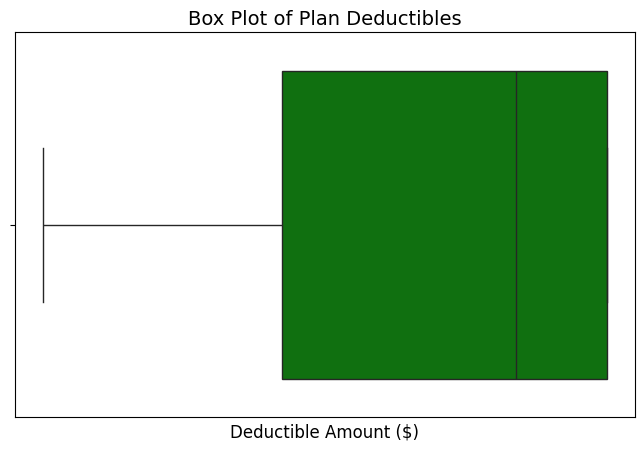

In [11]:
####### Distribution of Deductibles ##########
plt.figure(figsize=(8,5))
sns.boxplot(x=df["DEDUCTIBLE"].dropna(), color="green")

plt.title("Box Plot of Plan Deductibles", fontsize=14)
plt.xlabel("Deductible Amount ($)", fontsize=12)
plt.xticks([])  # Remove overlapping labels

plt.show()


# Helps see the typical deductible amount & any extreme values.

/var/folders/g_/c4f93b1s3sb7z3s30n19hdzh0000gn/T/ipykernel_26069/675448336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")


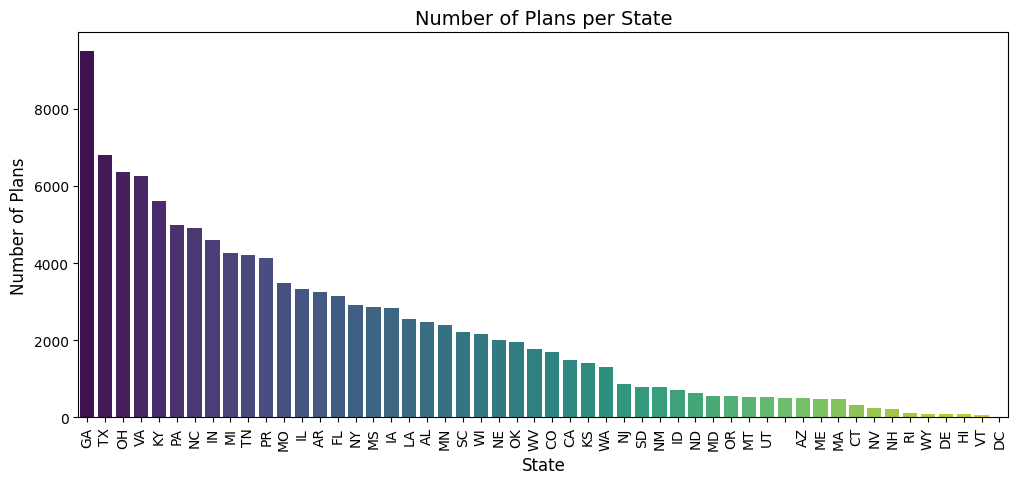

In [ ]:
############ Count of Plans by State (Bar Chart) ############
plt.figure(figsize=(12,5))
state_counts = df["STATE"].value_counts()

sns.barplot(x=state_counts.index, y=state_counts.values, palette="viridis")

plt.title("Number of Plans per State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Plans", fontsize=12)
plt.xticks(rotation=90)  # Rotate to prevent overlap

plt.show()



# Highlights which states have the most Part D plans.

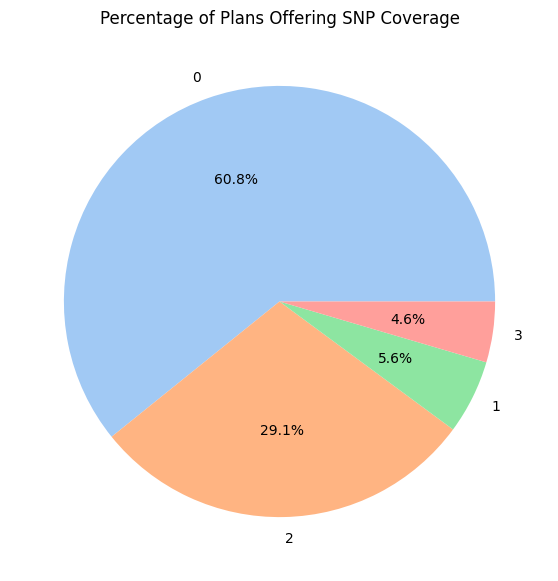

In [ ]:
plt.figure(figsize=(7,7))
snp_counts = df["SNP"].value_counts()

plt.pie(snp_counts, labels=snp_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Percentage of Plans Offering SNP Coverage")

plt.show()



# 0   Not an SNP Plan (Regular Medicare Part D plan)
# 1	Chronic Condition SNP (C-SNP) - For people with severe or disabling chronic conditions
# 2	Dual Eligible SNP (D-SNP) - For people eligible for both Medicare & Medicaid
# 3	Institutional SNP (I-SNP) - For people living in nursing homes or requiring institutional care